# Grouping for aggregation, transformation and filteration

In [2]:
import numpy as np
import pandas as pd

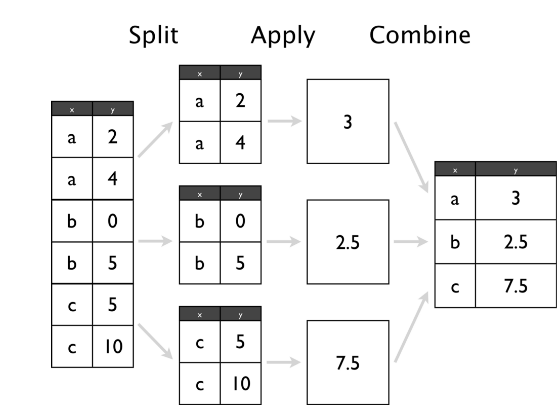

In [28]:
from IPython.display import Image
Image(filename='splitapplycombine.png') # Hadley Wickham

Pandas' groupby is undoubtly one of the most powerful functionalities that Pandas brings to the table. However, most users only utilize a fraction of the capabilities of `groupby`. 

`Groupby` allows to adopt a split-apply-combine approach to your data set. This is comparable to slicing and dicing your data such that it serves your specific need.

On a high level this means:
1. split the data based on column(s)/condition(s) into groups
2. apply a function/transformation to all the groups and combine the results into an output

In the previous section we discussed how to group the data based on various conditions. This section deals with available functions that we can apply to the groups before combining them to a final result.

The section is structured along how to use
1. apply,
2. agg(regate),
3. transform, and
4. filter,
on a grouped object.

If you are anything like me when I started using groupby, you are probably using a combination of 1. and 2. along the lines of:

`group = df.groupby('GROUP')` and then:
- `group.apply(mean)`
- `group.agg(mean)`
- `group['INTERSTING COLUMN'].apply(mean)`
- `group.agg({'INTERSTING COLUMN':mean})`
- `group.mean()`

Where `mean` could also be another function.

All of them work. And most of the time, the result is going to be roughly what you expected it to be. However, there are nuances to apply and agg that are worthwhile pointing out.

Additionally, but much more importantly there are two lesser-known extremly powerful functions that can be used on a grouped object, `filter` and `transform`.

In [2]:
df=pd.read_csv('data/flights.csv')
df.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [4]:
group_cols=['AIRLINE'] # groupby columns or grouping column
agg_dict={'ARR_DELAY':'mean'} # agg columns : agg function
df.groupby(group_cols).agg(agg_dict).head()

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580


# Grouping and aggregating with multiple columns and functions

In [8]:
# The number of cancelled flights for every airline per day weekday
group_cols=['AIRLINE', 'WEEKDAY'] # groupby columns or grouping column
agg_dict={'CANCELLED':'sum'} # agg columns : agg function
df.groupby(group_cols).agg(agg_dict).head(7)
#df.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED'].agg('sum').head(7)

CANCELLED
AIRLINE WEEKDAY           
AA      1               41
        2                9
        3               16
        4               20
        5               18
        6               21
        7               29

In [10]:
#Find the number and percentage of cancelled and diverted flights for every airline per weekday
group_cols=['AIRLINE', 'WEEKDAY'] # groupby columns or grouping column
agg_dict={'CANCELLED':['sum','mean'],'DIVERTED':['sum','mean']} # agg columns : agg function
df.groupby(group_cols).agg(agg_dict).head(7)
#flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED', 'DIVERTED'].agg(['sum', 'mean']).head(7)

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
        6              21  0.018667        9  0.008000
        7              29  0.021837        1  0.000753

# Customizing an aggregation function

In [3]:
df = pd.read_csv('data/college.csv')
df.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [5]:
df.groupby('STABBR')['UGDS'].agg(['mean', 'std']).round(0).head()

,mean,std
STABBR,,
AK,2493.0,4052.0
AL,2790.0,4658.0
AR,1644.0,3143.0
AS,1276.0,NaN
AZ,4130.0,14894.0


In [6]:
# find the maximum number of standard deviation from the mean that any single population value is per state.
def max_deviation(s):
    std_score = (s - s.mean()) / s.std()
    return std_score.abs().max()

In [7]:
df.groupby('STABBR')['UGDS'].agg(max_deviation).round(1).head()

STABBR
AK    2.6
AL    5.8
AR    6.3
AS    NaN
AZ    9.9
Name: UGDS, dtype: float64

# Examining a groupby object

In [8]:
df = pd.read_csv('data/college.csv')
grouped = df.groupby(['STABBR', 'RELAFFIL'])
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [9]:
print([attr for attr in dir(grouped) if not attr.startswith('_')])

['CITY', 'CURROPER', 'DISTANCEONLY', 'GRAD_DEBT_MDN_SUPP', 'HBCU', 'INSTNM', 'MD_EARN_WNE_P10', 'MENONLY', 'PCTFLOAN', 'PCTPELL', 'PPTUG_EF', 'RELAFFIL', 'SATMTMID', 'SATVRMID', 'STABBR', 'UG25ABV', 'UGDS', 'UGDS_2MOR', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_NHPI', 'UGDS_NRA', 'UGDS_UNKN', 'UGDS_WHITE', 'WOMENONLY', 'agg', 'aggregate', 'all', 'any', 'apply', 'backfill', 'bfill', 'boxplot', 'corr', 'corrwith', 'count', 'cov', 'cumcount', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'dtypes', 'expanding', 'ffill', 'fillna', 'filter', 'first', 'get_group', 'groups', 'head', 'hist', 'idxmax', 'idxmin', 'indices', 'last', 'mad', 'max', 'mean', 'median', 'min', 'ndim', 'ngroup', 'ngroups', 'nth', 'nunique', 'ohlc', 'pad', 'pct_change', 'pipe', 'plot', 'prod', 'quantile', 'rank', 'resample', 'rolling', 'sample', 'sem', 'shift', 'size', 'skew', 'std', 'sum', 'tail', 'take', 'transform', 'tshift', 'var']


In [10]:
groups = list(grouped.groups.keys())
groups[:6]

[('AK', 0), ('AK', 1), ('AL', 0), ('AL', 1), ('AR', 0), ('AR', 1)]

In [11]:
grouped.get_group(('FL', 1)).head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
712,The Baptist College of Florida,Graceville,FL,0.0,0.0,0.0,1,545.0,465.0,0.0,...,0.0308,0.0000,0.0507,0.2291,1,0.5878,0.5602,0.3531,30800,20052
713,Barry University,Miami,FL,0.0,0.0,0.0,1,470.0,462.0,0.0,...,0.0164,0.0741,0.0841,0.1518,1,0.5045,0.6733,0.4361,44100,28250
714,Gooding Institute of Nurse Anesthesia,Panama City,FL,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,PrivacySuppressed
715,Bethune-Cookman University,Daytona Beach,FL,1.0,0.0,0.0,1,405.0,395.0,0.0,...,0.0198,0.0205,0.0190,0.0523,1,0.7758,0.8867,0.0647,29400,36250
724,Johnson University Florida,Kissimmee,FL,0.0,0.0,0.0,1,480.0,470.0,0.0,...,0.0045,0.0045,0.0136,0.1636,1,0.6689,0.7384,0.2185,26300,20199


## `pd.Grouper`
The biggest "gotcha" in that area for me was understanding pd.Grouper, which allows seamless aggregation on different date/time granularities.

In [23]:
df=pd.read_csv('https://raw.githubusercontent.com/faisalnawazmir/FinaTech_Quants/master/data/sales_data.csv', parse_dates=[3])

In [24]:
df.head()

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


### Advanced Example: Grouping by year

In [25]:
df.groupby(pd.Grouper(key='Date',freq='Y')).size()

Date
2014-12-31    19956
2015-12-31    20054
2016-12-31    20133
2017-12-31    20079
2018-12-31    19778
Freq: A-DEC, dtype: int64

#  Filtering for states with a majority minority

We use college data set to find all the states with more non-white undergrade students than white. 

In [15]:
df=pd.read_csv('data/college.csv', index_col='INSTNM')
grouped=df.groupby('STABBR')
grouped.ngroups

59

In [16]:
df['STABBR'].nunique() #verify the same number

59

In [21]:
grouped.size().head()

STABBR
AK     10
AL     96
AR     86
AS      1
AZ    133
dtype: int64

In [22]:
# This function return a boolean, dataframe is passed in function for each group. This function return ture if the group has
# more percentage of minority undergard students than user defined threshold.
def check_minority(df, threshold):
    minority_pct = 1 - df['UGDS_WHITE']
    total_minority = (df['UGDS'] * minority_pct).sum()
    total_ugds = df['UGDS'].sum()
    total_minority_pct = total_minority / total_ugds
    return total_minority_pct > threshold

In [23]:
college_filtered=grouped.filter(check_minority, threshold=0.5)
college_filtered.head()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Everest College-Phoenix,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,4102.0,...,0.0373,0.0,0.1026,0.4749,0,0.8291,0.7151,0.6700,28600,9500
Collins College,Phoenix,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,83.0,...,0.0241,0.0,0.3855,0.3373,0,0.7205,0.8228,0.4764,25700,47000
Empire Beauty School-Paradise Valley,Phoenix,AZ,0.0,0.0,0.0,1,NaN,NaN,0.0,25.0,...,0.0400,0.0,0.0000,0.1600,0,0.6349,0.5873,0.4651,17800,9588
Empire Beauty School-Tucson,Tucson,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,126.0,...,0.0000,0.0,0.0079,0.2222,1,0.7962,0.6615,0.4229,18200,9833
Thunderbird School of Global Management,Glendale,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,1.0,...,0.0000,0.0,0.0000,1.0000,0,0.0000,0.0000,0.0000,118900,PrivacySuppressed


In [25]:
df.shape

(7535, 26)

In [26]:
college_filtered.shape

(3028, 26)

In [27]:
college_filtered['STABBR'].nunique()

20

# Transforming 

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/faisalnawazmir/FinaTech_Quants/master/data/sales_data.csv', parse_dates=[3])

In [4]:
df.head()

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


Transform returns an on a group-level transformed version of the full data. \
The new output data has the same length as the input data. It is equivalent to SQL window function. \ 
Here lets have as an example, we get the percentage of the groups total by dividing by the group-wise sum.

In [21]:
df.groupby('Sales Rep')['Val'].transform(lambda x: x/sum(x))

0        0.004991
1        0.005693
2        0.003976
3        0.000799
4        0.003300
           ...   
99995    0.012088
99996    0.000711
99997    0.013741
99998    0.010695
99999    0.001533
Name: Val, Length: 100000, dtype: float64

In [11]:
grouped=df.groupby('Sales Rep') 
grouped.get_group('William Taylor')

,Order Id,Company Id,Company Name,Date,Val,Sale,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ
...,...,...,...,...,...,...,...,...
277,SSXAMW4NI562PCVL,S6GZQ71B95BFU60E,Automatic Credit,2016-04-16,1966,0,William Taylor,ZTZA0ZLYZR85PTUJ
278,DNKASVXZ7V6B4S2X,S6GZQ71B95BFU60E,Automatic Credit,2016-07-18,2144,0,William Taylor,ZTZA0ZLYZR85PTUJ
279,HUL3T8QWHU9BZ8ZE,S6GZQ71B95BFU60E,Automatic Credit,2016-03-13,222,0,William Taylor,ZTZA0ZLYZR85PTUJ
280,1L6J9FSRZHDI13SN,S6GZQ71B95BFU60E,Automatic Credit,2018-11-23,7765,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [8]:
grouped.size()

Sales Rep
Aaron Hendrickson    292
Adam Sawyer          324
Adele Kimmel         115
Adrian Daugherty     369
Adrianna Shelton      37
                    ... 
Willie Lin            44
Willie Rau            95
Willie Sanchez       309
Yvonne Jones          74
Yvonne Lindsey        67
Length: 499, dtype: int64

In [15]:
df1=df.groupby('Sales Rep')['Val'].sum()

In [16]:
df1['William Taylor']

1392909

In [20]:
round(6952/1392909,6)

0.004991

# Apply

In [22]:
df.groupby(
    pd.Grouper(key='Date',freq='Y')
)['Val','Sale'].apply(sum)

C:\Users\Zubair ahmed\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Val,Sale
Date,,
2014-12-31,100422394,3681
2015-12-31,101724648,3800
2016-12-31,101789642,3881
2017-12-31,101957784,3068
2018-12-31,100399962,2478


# Grouping contineous variables

In [5]:
# Grouping by 3 evenly cut "Order Value" buckets
df.groupby(
    pd.qcut(df['Val'],3,['low','mid','high'])
).agg({'Val':['mean','std'],'Sale':['sum','size']})

Val              Sale       
             mean         std   sum   size
Val                                       
low   1759.218063  955.198008  5653  33339
mid   5078.456234  957.488032  5577  33336
high  8352.541395  945.261300  5678  33325

In [6]:
# Grouping by cutom "Order Value" buckets
df.groupby(
    pd.cut(df['Val'],[0,3000,5000,7000,10000])
).agg({'Val':['mean','std'],'Sale':['sum','size']})

Val              Sale       
                      mean         std   sum   size
Val                                                
(0, 3000]      1555.837474  839.194392  4913  29220
(3000, 5000]   3998.367283  579.842580  3389  19892
(5000, 7000]   5999.759369  582.543076  3399  20359
(7000, 10000]  8488.592355  868.442376  5207  30529

In [26]:
#https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb

In [29]:
#Note: some of pictures for aggregation and most of material other than Pandas cookbook is taken from above source.

In [30]:
#https://github.com/faisalnawazmir/FinaTech_Quants